In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("/kaggle/input/modak-problem/modaka- puranpoli problem.csv")

In [24]:
df.columns

Index(['Order No', 'Customer Name', 'Order created Date',
       'Order completed Date', 'Order status', 'Order Invoice Value',
       'Payment Method', 'Discount on MRP', 'Shipping', 'item_name', 'SKU',
       'Item Invoice Value', 'Shipping Invoice Value', 'item_product_id',
       'item_vairation_id', 'item_id', 'Website Qty', 'MRP', 'Coupon Code',
       'ideal_UoM', 'Pack of', 'Tally_UoM', 'Tally_Qty', 'Item_Unit_Rate_TV',
       'Discount_%', 'Item_Amount_Tv', 'Shipping_TV', 'Order_TV', 'GSTIN',
       'Place of supply', 'CGST', 'SGST', 'IGST', 'Order_IV', 'hasError',
       'diff', 'totalIV'],
      dtype='object')

In [25]:
df.head()

,Order No,Customer Name,Order created Date,Order completed Date,Order status,Order Invoice Value,Payment Method,Discount on MRP,Shipping,item_name,...,Order_TV,GSTIN,Place of supply,CGST,SGST,IGST,Order_IV,hasError,diff,totalIV
0,359433,Shweta More,2023-07-07T10:53:54,2023-07-08T13:36:42.531Z,completed,245.1,cod,22.9,37.142857,Handmade Ukadiche Modak - 5 pieces,...,233.43,NaN,Maharashtra,5.84,5.84,0.0,245.1,NaN,NaN,NaN
1,359516,Ankit Bhowmick,2023-07-07T17:06:16,2023-07-08T13:42:10.819Z,completed,218.1,cod,19.9,37.142857,Handmade Puranpoli - 5 pieces,...,207.71,NaN,Maharashtra,5.19,5.19,0.0,218.1,NaN,NaN,NaN
2,359423,Samidha Virkud,2023-07-07T10:30:56,2023-07-08T14:31:11.450Z,completed,1516.0,cod,0.0,0.000000,Dink Ladoo - 300gms,...,399.05,NaN,Maharashtra,9.98,9.98,0.0,419.0,NaN,NaN,NaN
3,359423,Samidha Virkud,2023-07-07T10:30:56,2023-07-08T14:31:11.450Z,completed,1516.0,cod,0.0,0.000000,Rava Ladoo - 350gms,...,399.05,NaN,Maharashtra,9.98,9.98,0.0,419.0,NaN,NaN,NaN
4,359423,Samidha Virkud,2023-07-07T10:30:56,2023-07-08T14:31:11.450Z,completed,1516.0,cod,0.0,0.000000,Besan Ladoo ( Pure Ghee ) - 350gms,...,399.05,NaN,Maharashtra,9.98,9.98,0.0,419.0,NaN,NaN,NaN


In [26]:
df['Order status'].unique()

array(['completed', 'processing', 'out-for-delivery', 'packed',
       'rto completed', 'rto', 'out-for-deliver'], dtype=object)

In [27]:
df.item_name.unique()

array(['Handmade Ukadiche Modak - 5 pieces',
       'Handmade Puranpoli - 5 pieces', 'Dink Ladoo - 300gms',
       'Rava Ladoo - 350gms', 'Besan Ladoo ( Pure Ghee ) - 350gms',
       'Chivda - 400gms', 'Bhajani Chakli - 400gms',
       'Shankarpali - 400gm, Sweet',
       'Protein Ladoo (Sugarfree, Gluten Free & Oil free) - 300gms',
       'Handmade Ukadiche Modak - 10 pieces',
       'Handmade Puranpoli - 10 pieces',
       'Nachni Ladoo ( Pure Ghee ) - 350gms', 'Panjeeri Ladoo - 300gms',
       'Makhana - Himalayan Salt - 60 gms, Himalayan Salt',
       'Methi Ladoo ( Pure Ghee ) - 300gms', 'Kachori - 400gms',
       'Makhana - Himalayan Salt - 180 gms, Himalayan Salt'], dtype=object)

In [28]:
df = df.loc[:,['Order created Date','Order No','item_name','Pack of']]

In [29]:
df

,Order created Date,Order No,item_name,Pack of
0,2023-07-07T10:53:54,359433,Handmade Ukadiche Modak - 5 pieces,5.00
1,2023-07-07T17:06:16,359516,Handmade Puranpoli - 5 pieces,5.00
2,2023-07-07T10:30:56,359423,Dink Ladoo - 300gms,0.30
3,2023-07-07T10:30:56,359423,Rava Ladoo - 350gms,0.35
4,2023-07-07T10:30:56,359423,Besan Ladoo ( Pure Ghee ) - 350gms,0.35
...,...,...,...,...
8028,2023-07-20T23:53:59,362279,Bhajani Chakli - 400gms,0.40
8029,2023-07-20T12:20:10,362110,Chivda - 400gms,0.40
8030,2023-07-20T12:20:10,362110,Bhajani Chakli - 400gms,0.40
8031,2023-07-20T12:20:10,362110,Rava Ladoo - 350gms,0.35


In [30]:
from datetime import datetime 
# Define a function to convert datetime string to datetime object
def convert_to_datetime(datetime_string):
    return datetime.strptime(datetime_string, '%Y-%m-%dT%H:%M:%S')

# Apply the conversion function to the "Order Created Date and Time" column
df['Order created Date'] = df['Order created Date'].apply(convert_to_datetime)


In [31]:
# df['Order Created Date'] = pd.to_datetime(df['Order created Date'])

# Sort the DataFrame based on the "Order Created Date and Time" column
df = df.sort_values('Order created Date', ascending=True)

In [32]:
# df= df.set_index('Order created Date')

In [33]:
item_names= df.item_name.unique()

In [34]:
import matplotlib.pyplot as plt

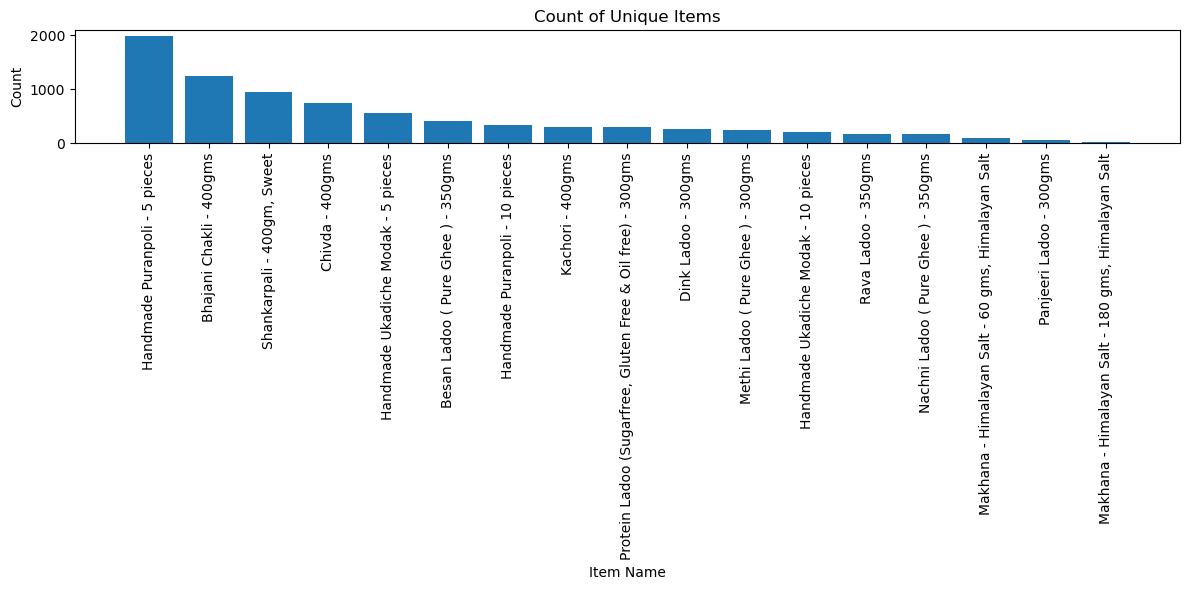

In [35]:
# Create a DataFrame to store the unique item names
df_items = pd.DataFrame(item_names, columns=["item_name"])

# Count the occurrences of each unique item
item_counts = df["item_name"].value_counts()

# Plot the data using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(item_counts.index, item_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Item Name")
plt.ylabel("Count")
plt.title("Count of Unique Items")
plt.tight_layout()
plt.show()

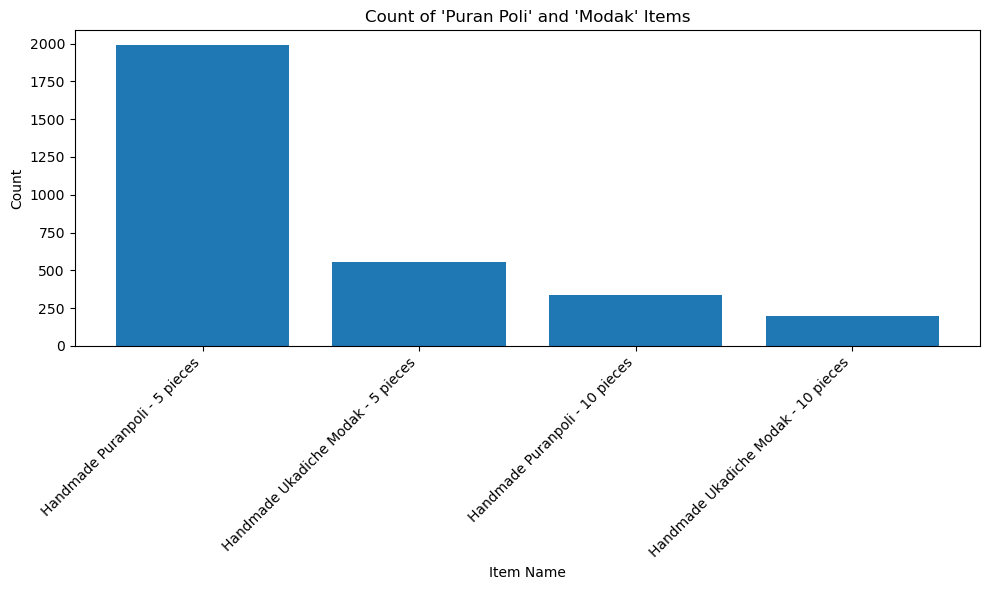

In [36]:
# Filter the item names to include only those with "puran poli" or "modak"
filtered_items = df[df["item_name"].str.contains("Puranpoli|Modak", case=False)]

# Count the occurrences of each filtered item
item_counts = filtered_items["item_name"].value_counts()

# Plot the data using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(item_counts.index, item_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Item Name")
plt.ylabel("Count")
plt.title("Count of 'Puran Poli' and 'Modak' Items")
plt.tight_layout()
plt.show()

In [37]:
df['Order No']

2961    358090
498     358091
2787    358092
2788    358092
2789    358092
         ...  
2138    362876
2139    362876
2140    362876
2141    362876
7767    362877
Name: Order No, Length: 8033, dtype: int64

In [38]:
# Count how many items are ordered for each unique order number
order_counts = df['Order No'].value_counts()

# Print the result

print(order_counts)


360785    10
361142     8
362138     8
361148     7
361629     7
          ..
360261     1
360257     1
360254     1
360250     1
362877     1
Name: Order No, Length: 3923, dtype: int64


In [39]:
order_counts = df['Order No'].value_counts()

# Filter the order numbers that have more than 2 items ordered
order_numbers_with_more_than_2_items = order_counts[order_counts >= 2].index

# Filter the DataFrame to keep only the orders with more than 2 items
filtered_df = df[df['Order No'].isin(order_numbers_with_more_than_2_items)]

# Drop the orders that have 1 item ordered
filtered_df = filtered_df.groupby('Order No').filter(lambda x: len(x) > 1)


In [40]:
filtered_df

,Order created Date,Order No,item_name,Pack of
2787,2023-07-01 00:15:41,358092,"Protein Ladoo (Sugarfree, Gluten Free & Oil fr...",0.30
2788,2023-07-01 00:15:41,358092,Handmade Puranpoli - 5 pieces,5.00
2789,2023-07-01 00:15:41,358092,Kachori - 400gms,0.40
2962,2023-07-01 00:17:10,358093,Dink Ladoo - 300gms,0.30
2963,2023-07-01 00:17:10,358093,Bhajani Chakli - 400gms,0.40
...,...,...,...,...
2135,2023-07-23 23:23:20,362875,Handmade Puranpoli - 5 pieces,5.00
2138,2023-07-23 23:25:42,362876,Handmade Puranpoli - 5 pieces,5.00
2139,2023-07-23 23:25:42,362876,Bhajani Chakli - 400gms,0.40
2140,2023-07-23 23:25:42,362876,Chivda - 400gms,0.40


In [53]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'filtered_df' containing the orders with more than 2 items
# Replace 'filtered_df' with your actual DataFrame name

# Group by 'Order No' and collect the items for each order number in a list
order_item_groups = filtered_df.groupby('Order No')['item_name'].apply(list)

# Create a DataFrame to store the item combinations and their counts
item_combinations_df = pd.DataFrame(columns=['Item Combination', 'Count'])

# Calculate the combinations and their counts
for items in order_item_groups:
    item_combinations = list(itertools.combinations(items, 2));
    for combination in item_combinations:
        item_combinations_df = item_combinations_df.append({'Item Combination': combination, 'Count': 1}, ignore_index=True);

# Group by item combinations and sum the counts
item_combinations_counts = item_combinations_df.groupby('Item Combination')['Count'].sum()

# Sort the combinations based on counts in descending order and take the top 10
top_10_combinations = item_combinations_counts.sort_values(ascending=False).head(10)

/tmp/ipykernel_32/996007327.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  item_combinations_df = item_combinations_df.append({'Item Combination': combination, 'Count': 1}, ignore_index=True);
/tmp/ipykernel_32/996007327.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  item_combinations_df = item_combinations_df.append({'Item Combination': combination, 'Count': 1}, ignore_index=True);
/tmp/ipykernel_32/996007327.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  item_combinations_df = item_combinations_df.append({'Item Combination': combination, 'Count': 1}, ignore_index=True);
/tmp/ipykernel_32/996007327.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [54]:
# import itertools

# # Assuming you have the 'order_item_combinations' dictionary from the previous code
# # Replace 'order_item_combinations' with your actual dictionary name

# # Sort the order counts in descending order and take the top 10 order numbers
# top_5_orders = order_counts.head(5).index

# # Filter the order_item_combinations dictionary to include only the top 10 orders
# top_5_combinations = {order_number: combinations for order_number, combinations in filtered_df.items() if order_number in top_5_orders}

# # Print the combinations for the top 10 orders
# for order_number, combinations in top_5_combinations.items():
#     print(f"Order No: {order_number}")
#     for combination in combinations:
#         print(combination)
#     print("---------------------")


In [55]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Assuming you have the 'order_item_combinations' dictionary from the previous code
# # Replace 'order_item_combinations' with your actual dictionary name

# # Create an empty graph
# G = nx.Graph()

# # Add edges (combinations) to the graph from the 'order_item_combinations' dictionary
# for order_combinations in top_5_combinations.values():
#     for combination in order_combinations:
#         G.add_edge(*combination)

# # Draw the network graph
# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G, k=0.1, seed=42)  # Adjust 'k' to control the layout
# nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=8, font_weight='bold', alpha=0.8, edge_color='gray')
# plt.title("Items Ordered Together")
# plt.axis('off')
# plt.show()


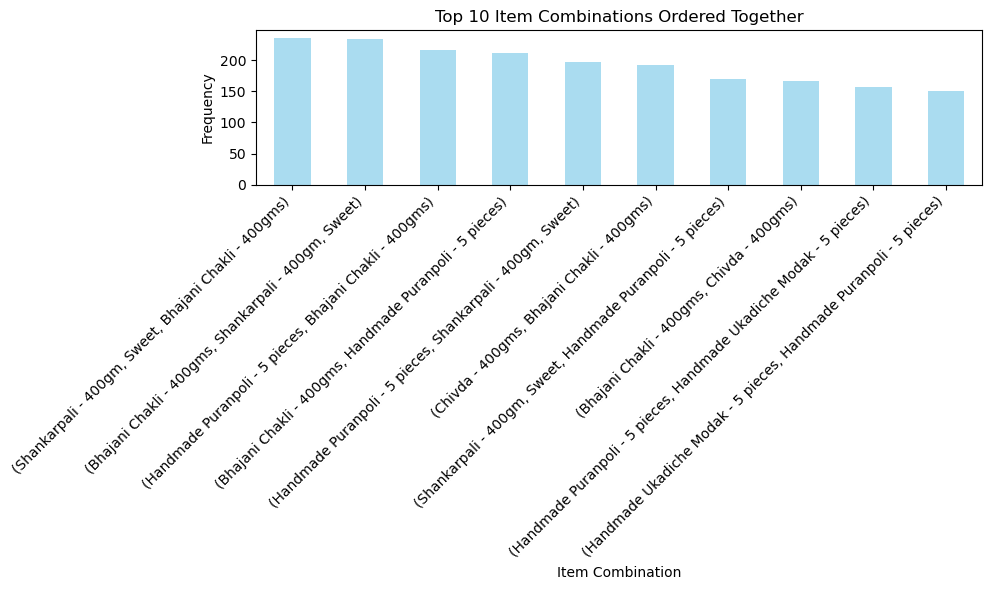

In [56]:
# Plot the top 10 item combinations using a bar chart
plt.figure(figsize=(10, 6))
top_10_combinations.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Item Combination')
plt.ylabel('Frequency')
plt.title('Top 10 Item Combinations Ordered Together')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()